In [54]:
import pandas as pd 
import numpy as np 

In [55]:
df = pd.read_csv("unit.csv")

In [56]:
df.head()

,Rank,Manufacturer,Model,Form Factor,Smartphone,Year,sold
0,1,Nokia,1100,Bar,False,2003,250.0
1,2,Nokia,1110,Bar,False,2005,247.5
2,3,Apple,iPhone 6 & 6 Plus,Touchscreen,True,2014,222.4
3,4,Nokia,105 Series,Bar,False,2013,200.0
4,5,Apple,iPhone 6S & 6S Plus,Touchscreen,True,2015,174.1


In [57]:
pd.isnull(df).sum()

Rank            0
Manufacturer    0
Model           0
Form Factor     0
Smartphone      0
Year            0
sold            0
dtype: int64

In [58]:
df.describe()

,Rank,Year,sold
count,120.000000,120.000000,120.000000
mean,60.500000,2012.758333,48.050000
std,34.785054,6.590030,58.044835
min,1.000000,1996.000000,2.000000
25%,30.750000,2007.000000,10.000000
50%,60.500000,2013.000000,22.050000
75%,90.250000,2019.000000,60.000000
max,120.000000,2024.000000,250.000000


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          120 non-null    int64  
 1   Manufacturer  120 non-null    object 
 2   Model         120 non-null    object 
 3   Form Factor   120 non-null    object 
 4   Smartphone    120 non-null    bool   
 5   Year          120 non-null    int64  
 6   sold          120 non-null    float64
dtypes: bool(1), float64(1), int64(2), object(3)
memory usage: 5.9+ KB


In [60]:
df.columns

Index(['Rank', 'Manufacturer', 'Model', 'Form Factor', 'Smartphone', 'Year',
       'sold'],
      dtype='object')

In [61]:
from sklearn.preprocessing import LabelEncoder 
Manufacturer=LabelEncoder()
Model=LabelEncoder()
FormFactor=LabelEncoder()
Smartphone=LabelEncoder()

In [62]:
df['Manufacturer']=Manufacturer.fit_transform(df['Manufacturer'])
df['Model']=Model.fit_transform(df['Model'])
df['Form Factor']=FormFactor.fit_transform(df['Form Factor'])
df['Smartphone']=Smartphone.fit_transform(df['Smartphone'])

In [63]:
df.tail()

,Rank,Manufacturer,Model,Form Factor,Smartphone,Year,sold
115,116,11,93,5,1,2024,2.7
116,117,11,96,5,1,2024,2.4
117,118,11,92,5,1,2023,2.2
118,119,1,82,5,1,2016,2.1
119,120,9,26,2,1,2007,2.0


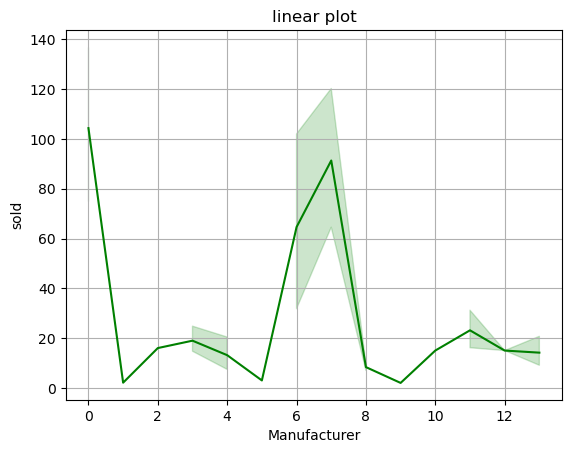

In [69]:
import seaborn as sns 
import matplotlib.pyplot as plt 
sns.lineplot(x="Manufacturer",y="sold",color="green",data=df)
plt.grid("darkgrid")
plt.title("linear plot")
plt.show()

In [70]:
x = df.drop(['sold'], axis='columns')
y = df.sold

In [73]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled[:3]

array([[-1.71767669, -0.12414411, -1.68880818, -1.68737773, -1.55838744,
        -1.48698083],
       [-1.68880818, -0.12414411, -1.65993966, -1.68737773, -1.55838744,
        -1.1822196 ],
       [-1.65993966, -1.83366958,  1.48672857,  0.66710282,  0.64168895,
         0.18920593]])

In [75]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2)

In [76]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((96, 6), (24, 6), (96,), (24,))

In [80]:
# Train using stand alone model

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

scores = cross_val_score(DecisionTreeRegressor(), x, y, cv=5)
scores

array([-3.98154591, -0.21496299,  0.32395647,  0.69839209, -5.38426113])

In [81]:
scores.mean()

-1.711684295777355

In [84]:
from sklearn.ensemble import BaggingRegressor

In [85]:
bag_model = BaggingRegressor(
    base_estimator=DecisionTreeRegressor(), 
    n_estimators=100, 
    max_samples=0.8, 
    oob_score=True,
    random_state=0
)
bag_model.fit(x_train, y_train)
bag_model.oob_score_

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.9821754878989856

In [86]:
bag_model.score(x_test, y_test)

0.9904372045548648

In [89]:
bag_model = BaggingRegressor(
    base_estimator=DecisionTreeRegressor(), 
    n_estimators=100, 
    max_samples=0.8, 
    oob_score=True,
    random_state=0
)
scores = cross_val_score(bag_model, x, y, cv=5)
scores

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


array([-4.10172018, -1.9711906 ,  0.2283376 ,  0.64046313, -5.15729697])

In [90]:
scores.mean()

-2.072281403573844